# Loan Features that affect the BorrowerRate
## by Namhla Hermans

 

## Investigation Overview

In this investigation, I aimed to look at the characteristic of a loan that can be used to predict the Borrower's Rate. The main focus was on the loans' original amount, and the borrower's income range.

## Dataset Overview

The dataset contains 81 variables for each loan entry such as: LoanOriginalAmount, BorrowerRate, LoanStatus, and more. 7761 data points and 11 attributes were removed from the analysis due to missing information.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
prosper = pd.read_csv('prosperLoanData.csv')

In [4]:
#dropping income ranges that are not displayed
prosper.drop(prosper.index[prosper['IncomeRange']=='Not displayed'], inplace=True)

#dropping null values in Delinquencies
prosper.dropna(subset=['DelinquenciesLast7Years'], inplace=True)

# Ordering Categorial variables
ordinal_dict= {'ProsperRating (Alpha)':['HR','E','D','C','B','A','AA'],
              'IncomeRange':['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'],
              'LoanStatus': ['Completed','FinalPaymentInProgress','Current','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (61-90 days)','Past Due (31-60 days)','Past Due (91-120 days)','Past Due (>120 days)','Defaulted','Cancelled','Chargedoff']}

for var in ordinal_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered= True, 
                                              categories= ordinal_dict[var])
    prosper[var] = prosper[var].astype(ordered_var)

#removing columns with all null values
prosper.dropna(axis=1, how='all', inplace=True)

#removing columns with data before july 2009, i.e the null values are greater than 29084
prosper.dropna(axis=1, thresh=29100, inplace=True)


## Distribution of BorrowerRate

The Borrower's Rate Hisrogram has multimodal Plateau distribution with the highest frquency for the rates being more than 5K just above 0.3. Only very few loans have interest rates greater than 0.35.

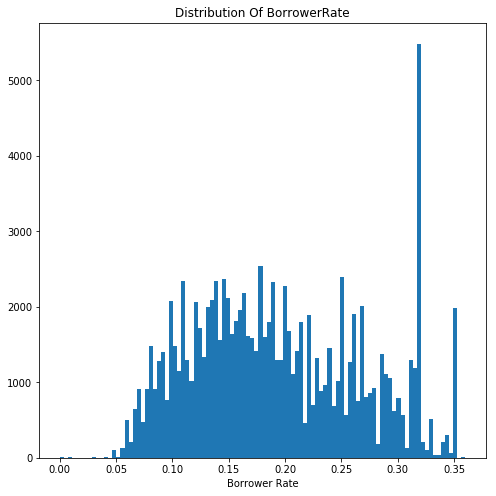

In [5]:
# A histogram plot for BorrowerRate
plt.figure(figsize=[8,8])
plt.hist(data=prosper, x='BorrowerRate', bins=100)
plt.xlabel('Borrower Rate')
plt.title('Distribution Of BorrowerRate')
plt.show()

## Distribution of LoanOriginalAmount

The distribution is positively skewed with the lower quartile just below 5K and the upper quartile at about 12K the interquartile range is about 8K  with multiple outliers just over 25K. The maximum original loan amount is just below 25K.<br>
The average originally borrowed amount is about 8K.<br>
The second distribution shows peaks in frequency at 5K, 10K, 15K, 20K, 25K 30K, and 35K which means that frequent loans are multiples of 5K.

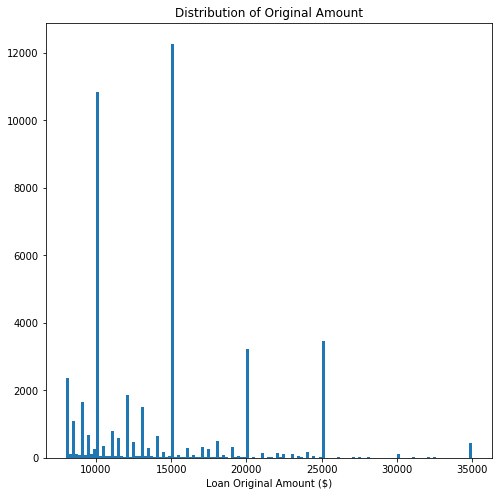

In [6]:
bins= np.arange(8000, prosper['LoanOriginalAmount'].max()+200, 200)
plt.figure(figsize=[8,8])
plt.hist(data= prosper, x='LoanOriginalAmount', bins=bins)
plt.xlabel('Loan Original Amount ($)')
plt.title('Distribution of Original Amount')
plt.show()

## Distribution of IncomeRange

Most of Prosper clientele's for this dataset have income ranges between 25K & 50K US Dollars. The plot shows that most of prosper loan borrowers earn well and can afford taking up loans.

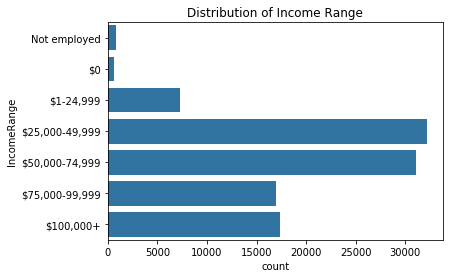

In [7]:
# A plot for the IncomeRange Distribution
base_color= sb.color_palette()[0]
IR_bar= sb.countplot(data= prosper, y= 'IncomeRange', color=base_color)
IR_bar.set_title('Distribution of Income Range')
IR_bar;

## BorrowerRate vs LoanOriginalAmount
The BorrowerRate decreases with increasing LoanOriginalAmount. Which makes sense as more money borrowed will lead to a less interest rate in the loan.

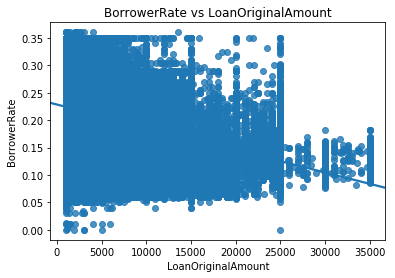

In [9]:
# A plot of BorrowerRate vs LoanOriginal Amount
reg2 = sb.regplot(data=prosper, x='LoanOriginalAmount', y='BorrowerRate', fit_reg=True, x_jitter=0.04)
reg2.set_title('BorrowerRate vs LoanOriginalAmount')

reg2;

## Loan Original Amount by Term for various Income Ranges

The Loan amount amplitude increases with higher income ranges and increasing repayment terms. People with higher incomes tend to borrow more money and especially if there is a long term to pay the money.

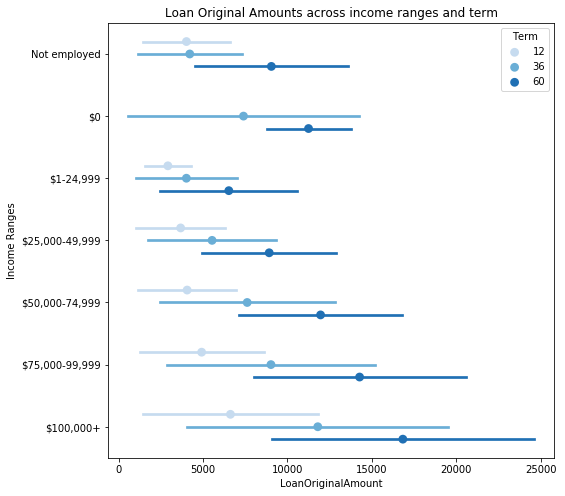

In [10]:
# The effect of loan terms on the relationship between the IncomeRange and LoanOriginalAmount
fig = plt.figure(figsize = [8,8])
ax = sb.pointplot(data = prosper, x = 'LoanOriginalAmount', y = 'IncomeRange', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Loan Original Amounts across income ranges and term')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Income Ranges')
ax.set_yticklabels([],minor = True);

### Generate Slideshow
Run the command below to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 391903 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
